# TIER protocol i tidy data
Piotr Hudaszek <br>
nr albumu 402035 <br>
grupa 2B piątek 10:45 <br>
8.10.2021 <br>
AiBD

## Spożycie alkocholu w poszczególnych państwach na podstawie danych WHO z 2010

Zródła danych:<br>
https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/
https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption

Dane opisują spożycie alkocholu w 193 krajach należących do ONZ, zostały one podzielone na spożycie piwa, wina, mocnych alkocholi i sumaryczne spożycie czystego alkocholu w litrach. Dane pokazują średnie spożycie alkocholu przez osóby powyżej 15 roku życia w ciągu roku, do średniej nie są brani abscynenci. <br>
Jako jednostkę(porcję) ang. serving alkocholu uznano: <br>
dla piwa standardowa puszkę<br>
dla wina kieliszek<br>
dla napoji wysokoprocentowych kieliszek do szotów<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

drinks = pd.read_csv("../Analysis data/drinks.csv")
#display(drinks)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(drinks)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
5,Antigua & Barbuda,102,128,45,4.9
6,Argentina,193,25,221,8.3
7,Armenia,21,179,11,3.8
8,Australia,261,72,212,10.4
9,Austria,279,75,191,9.7


### Tidy data

In [2]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.6+ KB


Na podstawie pandas info() można stwierdzić że nie ma pustych wierszy.

Dane są uporządkowane. Każda kolumna to jedna zmienna, obserwacjami są kraje w wierszach. Mamy jedną tabele jako że mamy jedną jednostkę obserwacyjną. Z tego powodu nie musiałem nic poprawiać w dataframe.

### Opis danych

In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [4]:
copy_drinks = drinks.copy()
copy_drinks.sort_values(by=['beer_servings'], inplace=True, ascending=False)
df1 = copy_drinks[['country', 'beer_servings']]
copy_drinks.sort_values(by=['spirit_servings'], inplace=True, ascending=False)
df2 = copy_drinks[['country', 'spirit_servings']]
copy_drinks.sort_values(by=['wine_servings'], inplace=True, ascending=False)
df3 = copy_drinks[['country', 'wine_servings']]
print("Top 5 państw spożywających najwięcej piwa")
display(df1.head(5))
print("\n\nTop 5 państw spożywających najwięcej alkocholi wysokoprocentowych")
display(df2.head(5))
print("\n\nTop 5 państw spożywających najwięcej wina")
display(df3.head(5))

Top 5 państw spożywających najwięcej piwa


,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343




Top 5 państw spożywających najwięcej alkocholi wysokoprocentowych


,country,spirit_servings
68,Grenada,438
15,Belarus,373
73,Haiti,326
141,Russian Federation,326
144,St. Lucia,315




Top 5 państw spożywających najwięcej wina


,country,wine_servings
61,France,370
136,Portugal,339
3,Andorra,312
166,Switzerland,280
48,Denmark,278


### Histogramy

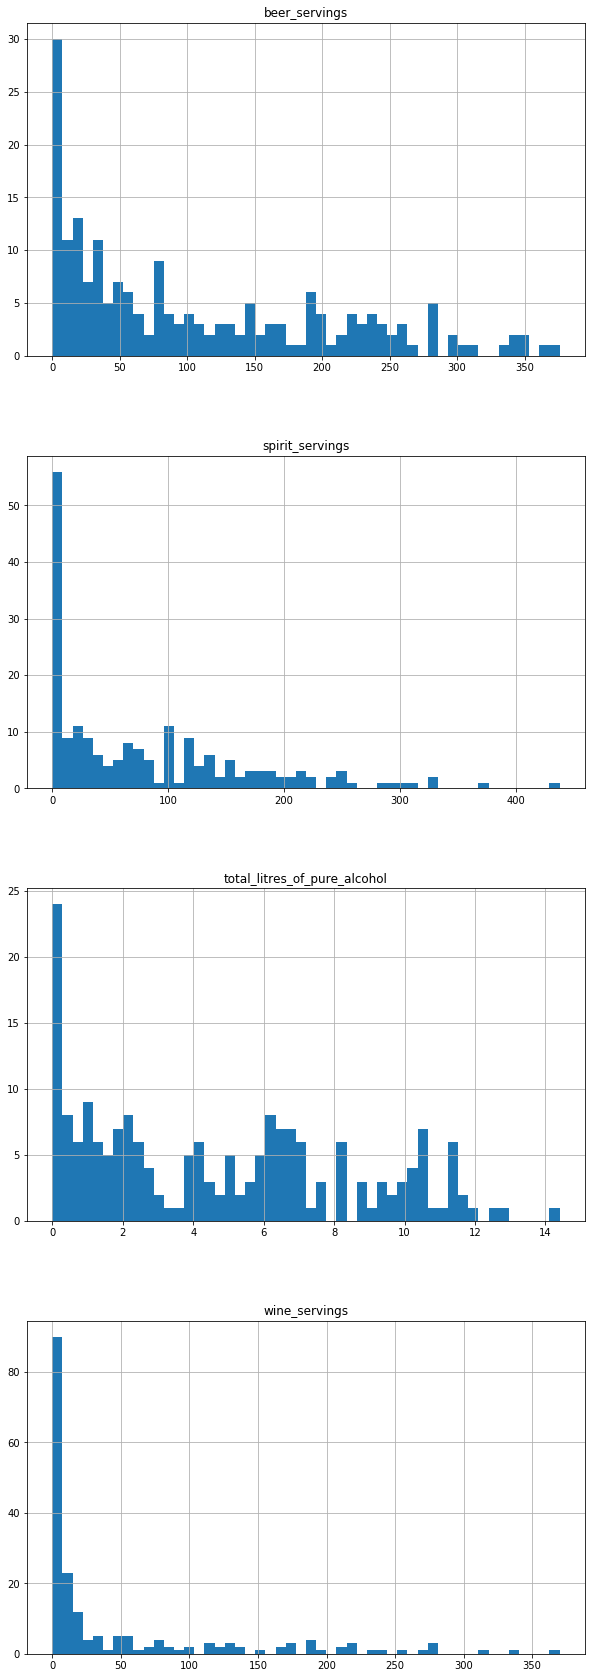

In [5]:
ax = drinks.hist(figsize = (10,30), layout = (4,1), bins=50 )
plt.show()